In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from math import log10, sqrt

In [2]:
input_folder = "currency notes"
output_folder = "output_reduced_intensity"
os.makedirs(output_folder, exist_ok=True)

In [3]:
def reduce_intensity(image):
    return np.clip(image * 0.3, 0, 255).astype(np.uint8)

input_folder = "currency notes"
output_folder = "output_reduced_intensity"
os.makedirs(output_folder, exist_ok=True)

# Process all images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith((".png", ".jpg", ".jpeg", ".bmp", ".tiff")):
        image_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        image = cv2.imread(image_path)
        if image is not None:
            reduced_image = reduce_intensity(image)
            cv2.imwrite(output_path, reduced_image)
            print(f"Processed: {filename}")
        else:
            print(f"Error loading: {filename}")

Processed: 1 (1).jpg
Processed: 1 (29).jpg
Processed: 1 (30).jpg
Processed: 1 (31).jpg
Processed: 1 (32).jpg
Processed: 1 (33).jpg
Processed: 1 (34).jpg
Processed: 1 (35).jpg
Processed: 1 (36).jpg
Processed: 1 (37).jpg
Processed: 1 (38).jpg
Processed: 1 (39).jpg
Processed: 1 (40).jpg
Processed: 1 (41).jpg
Processed: 1 (42).jpg
Processed: 1 (43).jpg
Processed: 1 (44).jpg
Processed: 1 (45).jpg
Processed: 1 (46).jpg
Processed: 1 (47).jpg
Processed: 1 (48).jpg
Processed: 1 (49).jpg
Processed: 1 (50).jpg
Processed: 1 (51).jpg
Processed: 1 (52).jpg
Processed: 1 (53).jpg
Processed: 1 (54).jpg
Processed: 1 (55).jpg
Processed: 1 (56).jpg
Processed: 1 (57).jpg
Processed: 1 (58).jpg
Processed: 1 (59).jpg
Processed: 1 (60).jpg


In [49]:
def display_images(input_image, enhanced_image, input_text="Input Image", output_text="Enhanced Image"):
    plt.figure(figsize=(12, 6))
    
    # Display Input Image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title(input_text)
    plt.axis('off')
    
    # Display Enhanced Image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title(output_text)
    plt.axis('off')
    
    # Show the images
    plt.show()

In [98]:
def filtering_based_enhancement(image,kernel_size):
    if kernel_size % 2 == 0:
        kernel_size += 1  # Make kernel size odd if it's even
    
    # Apply Median Filter
    enhanced_image = cv2.medianBlur(image, kernel_size)
    
    return enhanced_image

In [76]:
def compute_image_metrics(original, enhanced):
    """
    Computes PSNR, MSE, and SSIM between the original and enhanced images, 
    and prints the method names with corresponding values.
    
    Args:
    original (ndarray): The original image (BGR format).
    enhanced (ndarray): The enhanced image (BGR format).
    """
    # Calculate PSNR (Peak Signal-to-Noise Ratio)
    mse_val = np.mean((original - enhanced) ** 2)
    if mse_val == 0:
        psnr_value = 100  # Perfect match (no error)
    else:
        max_pixel = 255.0  # Max pixel value for an 8-bit image
        psnr_value = 20 * log10(max_pixel / sqrt(mse_val))
    
    # Calculate MSE (Mean Squared Error)
    mse_value = np.mean((original - enhanced) ** 2)

    # Calculate SSIM (Structural Similarity Index)
    ssim_value = ssim(original, enhanced, multichannel=True)
    return psnr_value, mse_value, ssim_value


In [77]:
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]


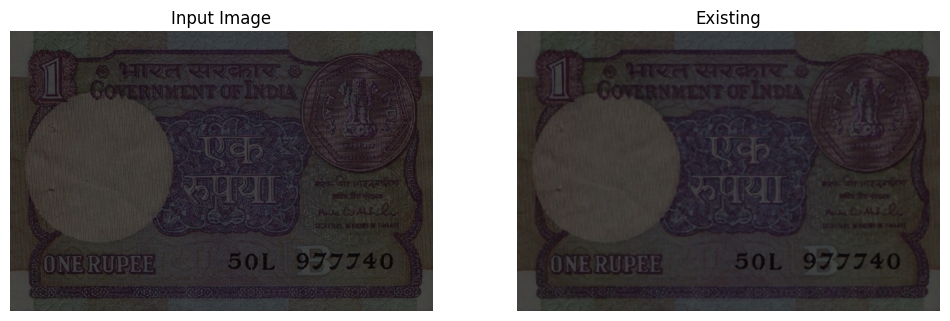

In [99]:
img_path = r"currency notes\Rupee-One-Note-currency.jpg"
img = cv2.imread(img_path)
img_file = r"temp.jpg"
reduced_img = reduce_intensity(img)
reduced_img_path = os.path.join(output_folder, f"reduced_{img_file}")
cv2.imwrite(reduced_img_path, reduced_img)

filtered_img = filtering_based_enhancement(reduced_img, 3)

display_images(reduced_img, filtered_img, input_text="Input Image", output_text="Existing")


In [79]:
psnr_value,mse_value,ssim_value = compute_image_metrics(reduced_img, filtered_img)
# Print Method Names and Corresponding Values

input_text="Existing Method"
print(f"{input_text}: PSNR, Value: {psnr_value:.2f} dB")
print(f"{input_text}: MSE, Value: {mse_value:.2f}")
print(f"{input_text}: SSIM, Value: {ssim_value:.4f}")

Existing Method: PSNR, Value: 33.86 dB
Existing Method: MSE, Value: 26.72
Existing Method: SSIM, Value: 0.7969


c:\users\asus\python376\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.


In [100]:
# Loop through different limits for analysis
limits = range(1, 13)  # Limits from 1 to 12
psnr_values, mse_values, ssim_values = [], [], []

for limit in limits:
    filtered_img = filtering_based_enhancement(reduced_img, limit)
    
    # Compute image metrics
    psnr_val, mse_val, ssim_val = compute_image_metrics(reduced_img, filtered_img)
    
    # Store values
    psnr_values.append(psnr_val)
    mse_values.append(mse_val)
    ssim_values.append(ssim_val)


c:\users\asus\python376\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.


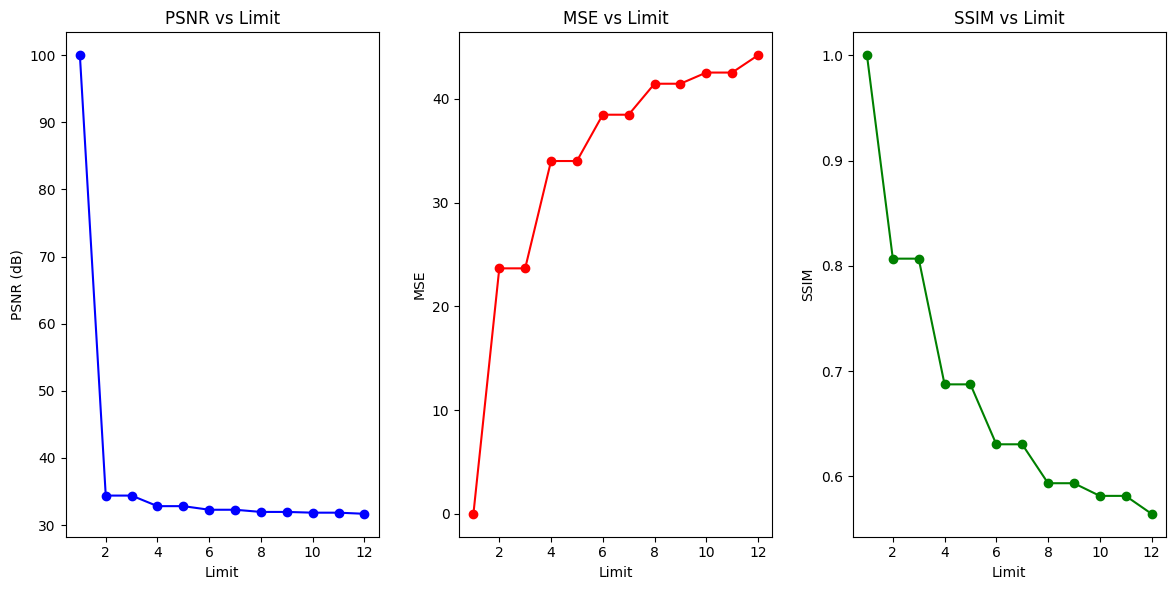

In [101]:
# Plot PSNR, MSE, SSIM vs Limit
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(limits, psnr_values, marker='o', color='b')
plt.title("PSNR vs Limit")
plt.xlabel("Limit")
plt.ylabel("PSNR (dB)")

plt.subplot(1, 3, 2)
plt.plot(limits, mse_values, marker='o', color='r')
plt.title("MSE vs Limit")
plt.xlabel("Limit")
plt.ylabel("MSE")

plt.subplot(1, 3, 3)
plt.plot(limits, ssim_values, marker='o', color='g')
plt.title("SSIM vs Limit")
plt.xlabel("Limit")
plt.ylabel("SSIM")

plt.tight_layout()
plt.show()


In [80]:
def hybrid_adaptive_hist_eq(image, block_size,limit):
    # Convert to YCrCb color space
    img_ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    y, cr, cb = cv2.split(img_ycrcb)
    
    # Calculate local contrast (variance) in the Y channel to dynamically adjust the clipLimit
    height, width = y.shape
    local_contrast = np.zeros_like(y)
    
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            # Get the block of the image
            block = y[i:i+block_size, j:j+block_size]
            
            # Calculate the variance of the block (local contrast)
            local_contrast[i:i+block_size, j:j+block_size] = np.var(block)
    
    # Normalize the local contrast to use as a basis for the clipLimit
    max_contrast = np.max(local_contrast)
    min_contrast = np.min(local_contrast)
    contrast_range = max_contrast - min_contrast
    
    # Dynamic adjustment of the clipLimit based on local contrast (dynamic histogram control)
    adaptive_clip_limit = limit * (contrast_range / (max_contrast + 1e-5))  # Avoid division by zero
    adaptive_clip_limit= min(adaptive_clip_limit,limit)
    # Apply CLAHE with the dynamically adjusted clipLimit
    clahe = cv2.createCLAHE(clipLimit=adaptive_clip_limit, tileGridSize=(8, 8))
    cl = clahe.apply(y)
    
    # Merge back the Y, Cr, Cb channels
    img_ycrcb = cv2.merge([cl, cr, cb])
    
    # Convert back to BGR
    result = cv2.cvtColor(img_ycrcb, cv2.COLOR_YCrCb2BGR)
    return result

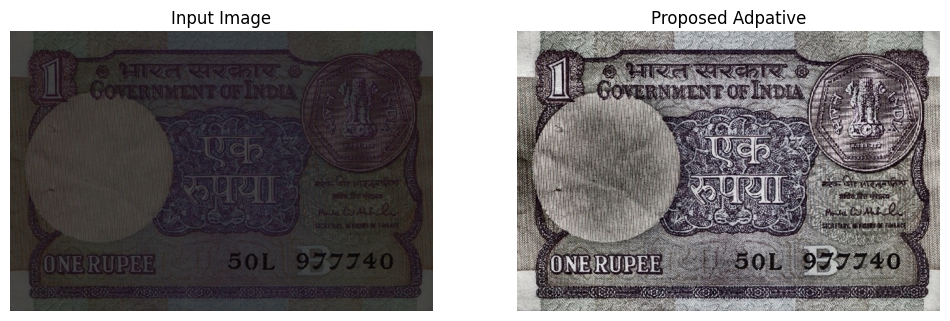

In [82]:
limit=6
enhanced_image = hybrid_adaptive_hist_eq(reduced_img, 16, limit)  # Apply adaptive histogram equalization
display_images(reduced_img, enhanced_image, input_text="Input Image", output_text="Proposed Adpative")


In [83]:
reduced_img1 = reduced_img.astype(np.float32) / 255.0
enhanced_image1 = enhanced_image.astype(np.float32) / 255.0
psnr_value,mse_value,ssim_value = compute_image_metrics(reduced_img1, enhanced_image1)
input_text="Proposed Method"
print(f"{input_text}: PSNR, Value: {psnr_value:.2f} dB")
print(f"{input_text}: MSE, Value: {mse_value:.2f}")
print(f"{input_text}: SSIM, Value: {ssim_value:.4f}")

Proposed Method: PSNR, Value: 58.12 dB
Proposed Method: MSE, Value: 0.10
Proposed Method: SSIM, Value: 0.3353


c:\users\asus\python376\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.


In [85]:
# Loop through different limits for analysis
limits = range(1, 13)  # Limits from 1 to 12
psnr_values, mse_values, ssim_values = [], [], []

for limit in limits:
    # Apply hybrid adaptive histogram equalization
    enhanced_image = hybrid_adaptive_hist_eq(reduced_img, block_size=16, limit=limit)
    
    # Normalize to [0, 1] for metrics computation
    reduced_img1 = img.astype(np.float32) / 255.0
    enhanced_image1 = enhanced_image.astype(np.float32) / 255.0
    
    # Compute image metrics
    psnr_val, mse_val, ssim_val = compute_image_metrics(reduced_img1, enhanced_image1)
    
    # Store values
    psnr_values.append(psnr_val)
    mse_values.append(mse_val)
    ssim_values.append(ssim_val)


c:\users\asus\python376\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.


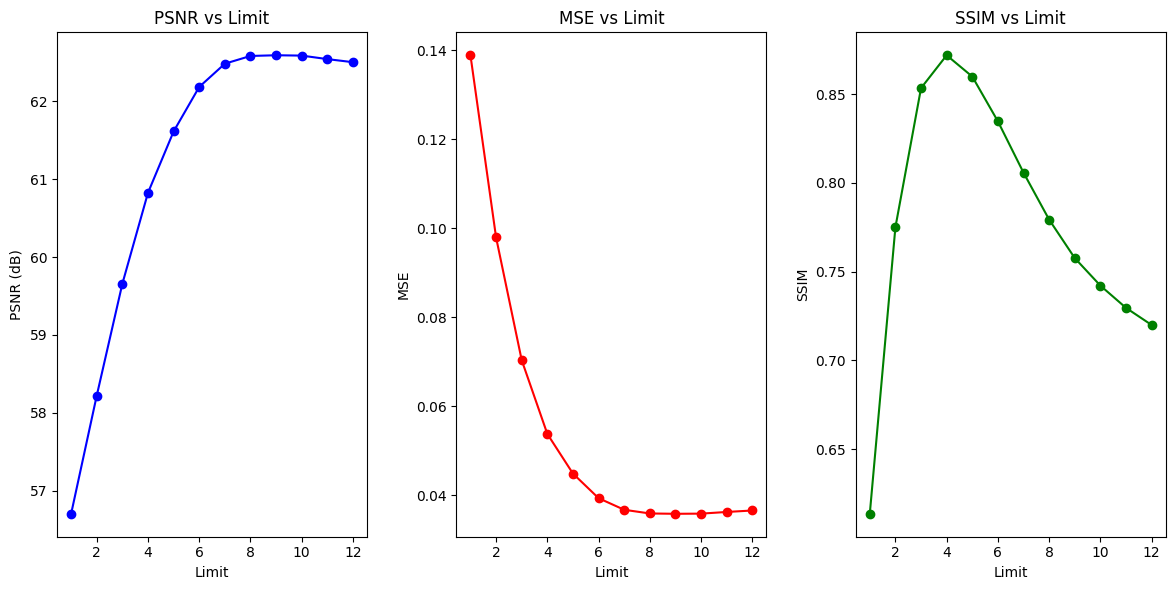

In [86]:
# Plot PSNR, MSE, SSIM vs Limit
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(limits, psnr_values, marker='o', color='b')
plt.title("PSNR vs Limit")
plt.xlabel("Limit")
plt.ylabel("PSNR (dB)")

plt.subplot(1, 3, 2)
plt.plot(limits, mse_values, marker='o', color='r')
plt.title("MSE vs Limit")
plt.xlabel("Limit")
plt.ylabel("MSE")

plt.subplot(1, 3, 3)
plt.plot(limits, ssim_values, marker='o', color='g')
plt.title("SSIM vs Limit")
plt.xlabel("Limit")
plt.ylabel("SSIM")

plt.tight_layout()
plt.show()


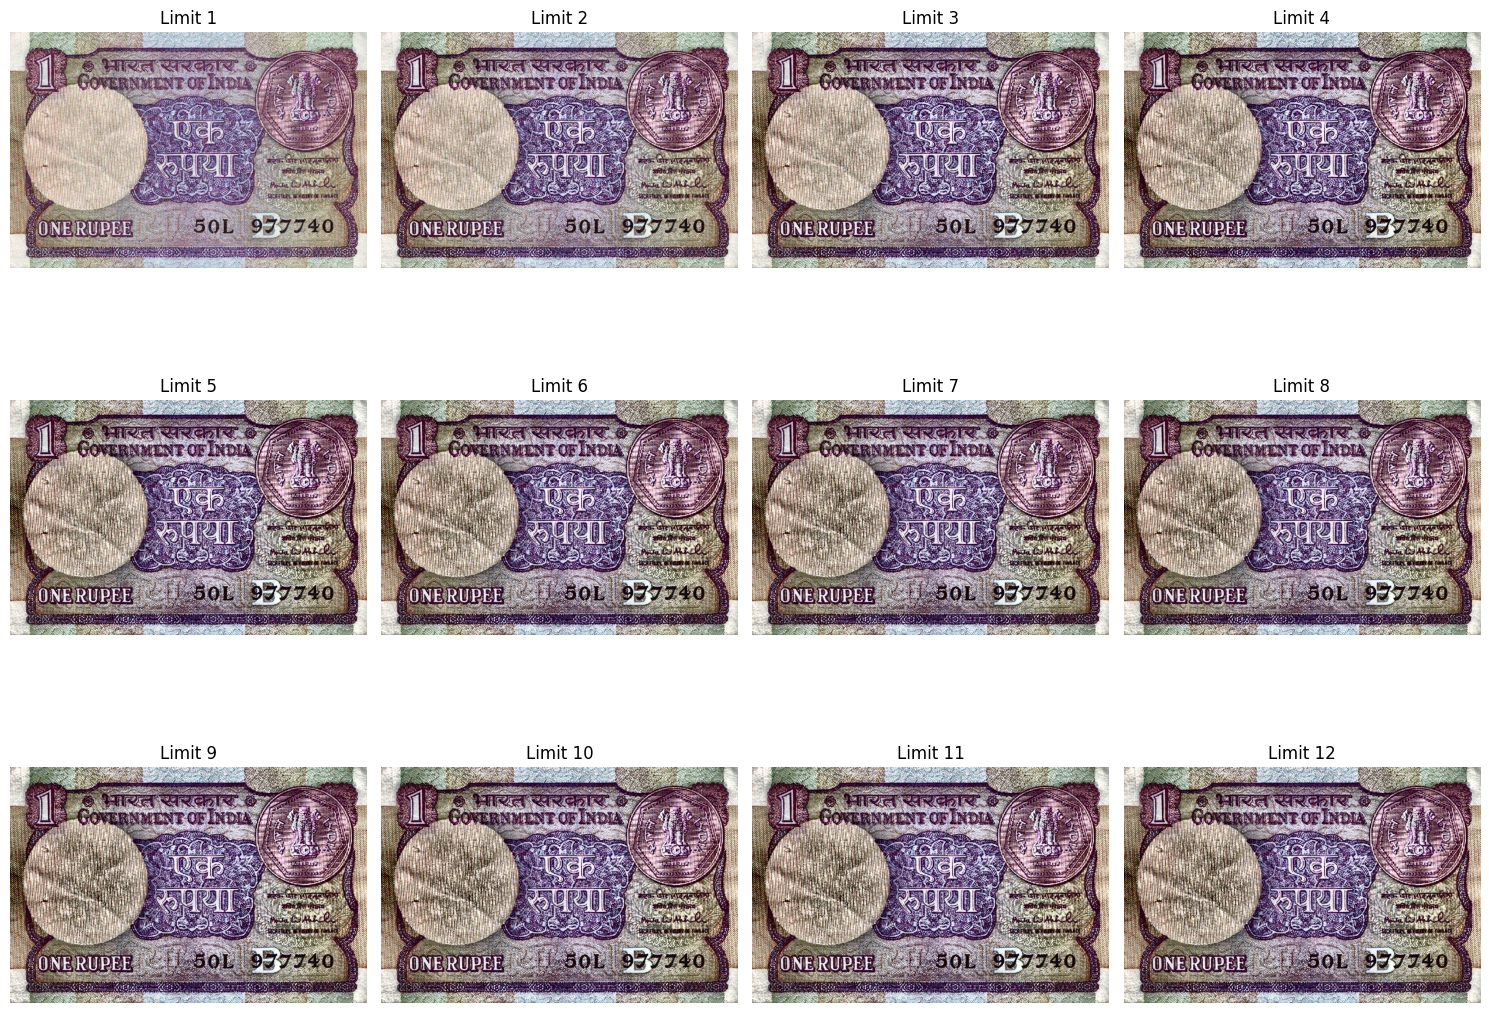

In [87]:
# Display enhanced images with subplots (max 3 rows and 4 columns)
num_images = len(limits)
rows = 3
cols = 4
plt.figure(figsize=(15, 12))

for i, limit in enumerate(limits):
    plt.subplot(rows, cols, i+1)
    enhanced_image = hybrid_adaptive_hist_eq(img, block_size=16, limit=limit)
    plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Limit {limit}")
    plt.axis('off')

plt.tight_layout()
plt.show()